Validation Accuracy: 0.84
Validation Precision: 0.75
Validation Recall: 0.9
Validation F1-score: 0.8181818181818182
Test Accuracy: 0.8461538461538461
Test Precision: 0.75
Test Recall: 1.0
Test F1-score: 0.8571428571428571


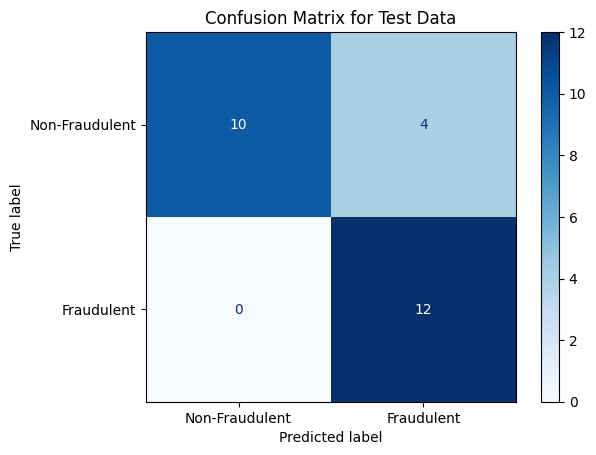

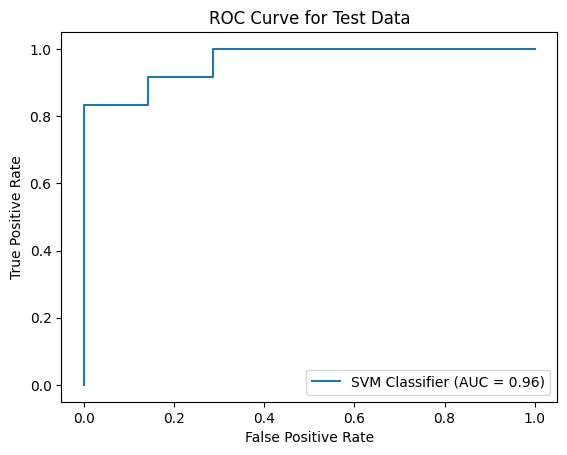

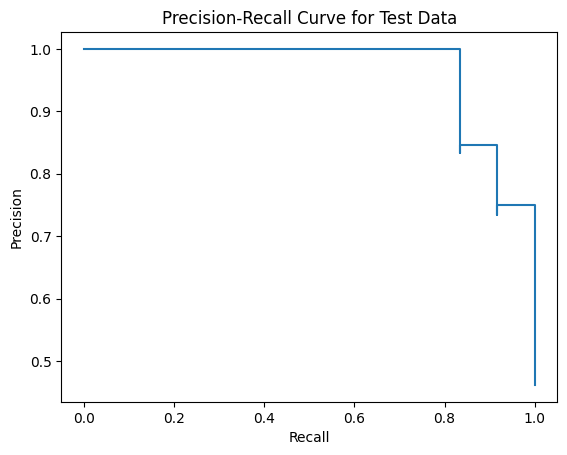

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, roc_auc_score, PrecisionRecallDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Load your CSV dataset
file_path = '/kaggle/input/financial-statement-fraud-data/Final_Dataset.csv'
dataset = pd.read_csv(file_path)

# Split the data into features and labels
X = dataset['Fillings']
y = dataset['Fraud']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Transform the text data using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Validate the model
y_val_pred = svm_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, pos_label='yes')
val_recall = recall_score(y_val, y_val_pred, pos_label='yes')
val_f1 = f1_score(y_val, y_val_pred, pos_label='yes')

# Test the model
y_test_pred = svm_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label='yes')
test_recall = recall_score(y_test, y_test_pred, pos_label='yes')
test_f1 = f1_score(y_test, y_test_pred, pos_label='yes')

print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)


# Test the model
y_test_pred = svm_model.predict(X_test_tfidf)

y_test_prob = svm_model.decision_function(X_test_tfidf)
fpr, tpr, _ = roc_curve(y_test, y_test_prob, pos_label='yes')
roc_auc = roc_auc_score(y_test, y_test_prob)

# Compute the precision and recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob, pos_label='yes')


# Plot Confusion Matrix for Test Data using the new method
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraudulent', 'Fraudulent'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data')
plt.show()

# Plot the ROC curve using the new method
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM Classifier')
display.plot()
plt.title('ROC Curve for Test Data')
plt.show()

# Plot the precision-recall curve using the new method
disp_pr = PrecisionRecallDisplay(precision=precision, recall=recall)
disp_pr.plot()
plt.title('Precision-Recall Curve for Test Data')
plt.show()